### Import necessary packages

In [3]:
from datetime import datetime
import time
#import it in console with: pip install pandas-datareader
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style

### Load the data
Input:

| Argument   | Description                             |
|------------|-----------------------------------------|
| ticker     | list of chosen tickers                  |
| start_date | start date of search in YYYY-M-D format |
| end_date   | end date of search in YYYY-M-D format   |

Output: Pandas DataFrame with financial data from Yahoo

In [4]:
def get_data_from_api(ticker, start_date, end_date):
    dataframe = wb.DataReader(ticker, 'yahoo', start_date, end_date)
    return dataframe
start = datetime(1990,1,1)
end = datetime(2021,4,1)
df = get_data_from_api("MSFT", start, end)
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-26,236.710007,231.550003,231.550003,236.479996,25479900.0,236.479996
2021-03-29,236.800003,231.880005,236.589996,235.240005,25227500.0,235.240005
2021-03-30,233.850006,231.100006,233.529999,231.850006,24792000.0,231.850006
2021-03-31,239.100006,232.389999,232.910004,235.770004,43623500.0,235.770004
2021-04-01,242.839996,238.050003,238.470001,242.350006,30338000.0,242.350006


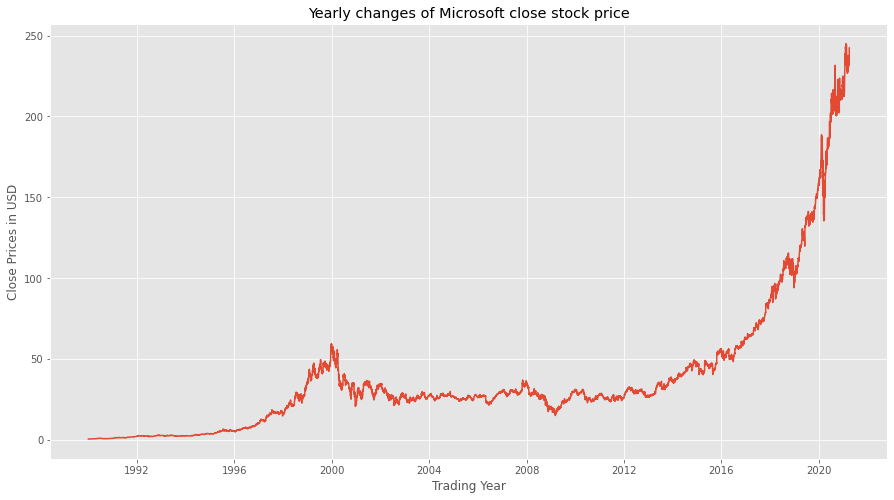

In [5]:
#plot close price
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.grid(True)
plt.xlabel('Trading Year')
plt.ylabel('Close Prices in USD')
plt.plot(df['Close'])
plt.title('Yearly changes of Microsoft close stock price')
plt.show()

### Visualization of Moving Averages
Calculating moving averages based on close price with a window of 5, 20, 100 and 200 days

In [6]:
close_px = df['Close']
MA5 = close_px.rolling(window = 5).mean()
MA20 = close_px.rolling(window = 20).mean()
MA100 = close_px.rolling(window = 100).mean()
MA200 = close_px.rolling(window = 200).mean()

Close price VS Moving Average 5/20/100/200 days of MSFT

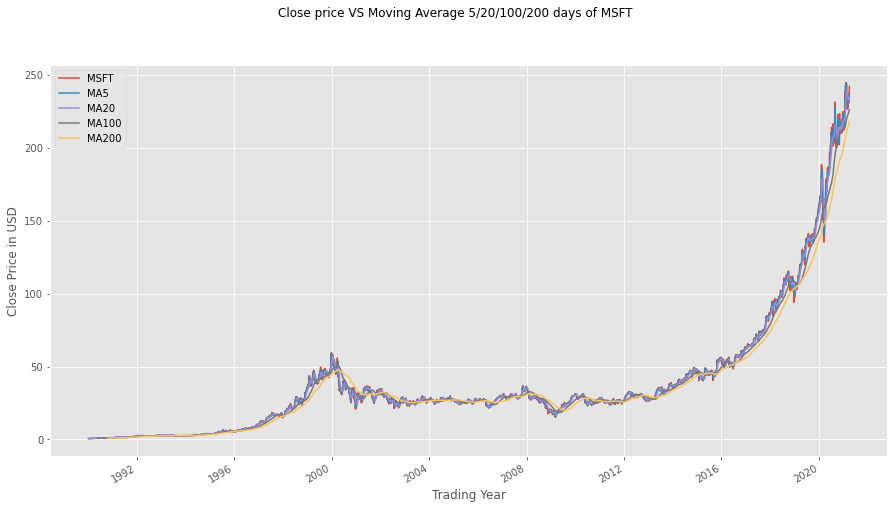

In [7]:
mpl.rc('figure', figsize = (15, 8))
style.use('ggplot')
close_px.plot(label = 'MSFT')
MA5.plot(label = 'MA5')
MA20.plot(label = 'MA20')
MA100.plot(label = 'MA100')
MA200.plot(label = 'MA200')
plt.xlabel('Trading Year')
plt.ylabel('Close Price in USD')
plt.suptitle('Close price VS Moving Average 5/20/100/200 days of MSFT')
plt.legend()
plt.show()

Absolute Error of MA VS Close Price

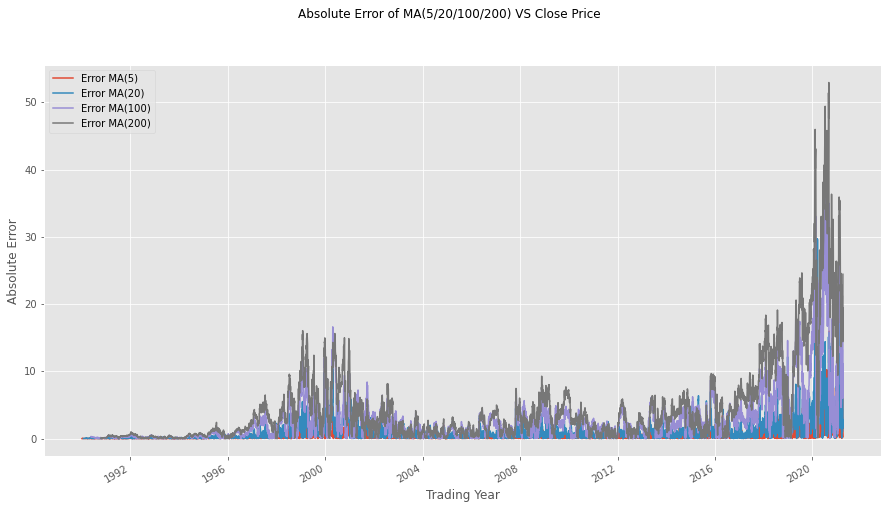

<Figure size 1080x576 with 0 Axes>

In [8]:
errorMA5 = close_px - MA5
errorMA5 = errorMA5.abs()
errorMA5.plot(label = 'Error MA(5)')
errorMA20 = close_px - MA20
errorMA20 = errorMA20.abs()
errorMA20.plot(label = 'Error MA(20)')
errorMA100 = close_px - MA100
errorMA100 = errorMA100.abs()
errorMA100.plot(label = 'Error MA(100)')
errorMA200 = close_px - MA200
errorMA200 = errorMA200.abs()
errorMA200.plot(label = 'Error MA(200)')
plt.legend()
plt.xlabel('Trading Year')
plt.ylabel('Absolute Error')
plt.suptitle('Absolute Error of MA(5/20/100/200) VS Close Price')
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

Preprocessing data for showing MA in 2020

In [9]:
#Seperate dataframe, keep original for further exploration
ma_df = df
#Drop non-used columns
ma_df = ma_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
#Drop NaN values
ma_df = ma_df.dropna()

## rolling mean
close_px = ma_df['Close']
ma_df['MA5'] = close_px.rolling(5, min_periods = 1).mean()
ma_df['MA20'] = close_px.rolling(20, min_periods = 1).mean()
ma_df['MA100'] = close_px.rolling(100, min_periods = 1).mean()
ma_df['MA200'] = close_px.rolling(200, min_periods = 1).mean()
print(ma_df.tail())

                 Close         MA5        MA20     MA100      MA200
Date                                                               
2021-03-26  236.479996  235.570001  233.582500  225.2842  216.97660
2021-03-29  235.240005  235.420001  233.497501  225.6133  217.22145
2021-03-30  231.850006  234.274002  233.396501  225.8675  217.44200
2021-03-31  235.770004  234.336002  233.807001  226.0613  217.67615
2021-04-01  242.350006  236.338004  234.588002  226.2519  217.92005


MA(5) VS Close Price in 2020

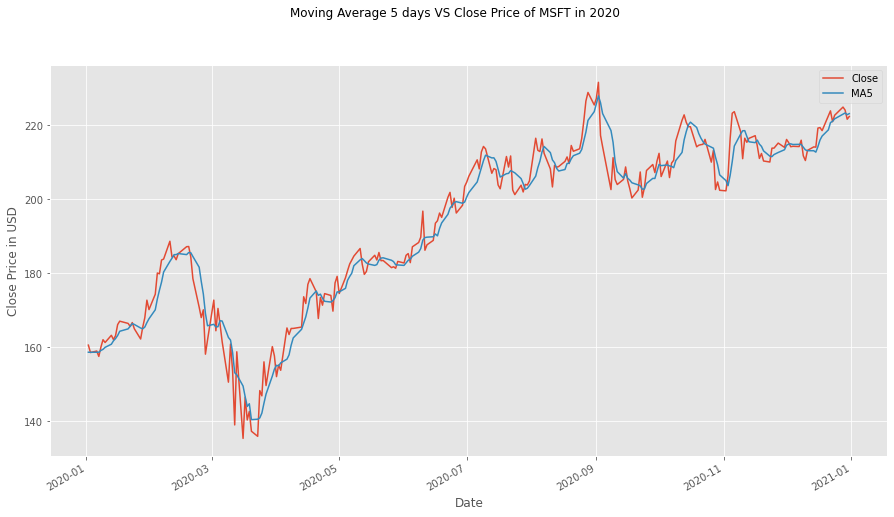

<Figure size 1080x576 with 0 Axes>

In [10]:
ma_df['Close'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8), label = 'Close')
ma_df['MA5'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8),label = 'MA5')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5 days VS Close Price of MSFT in 2020')
plt.legend()
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

MA(20) VS Close Price in 2020

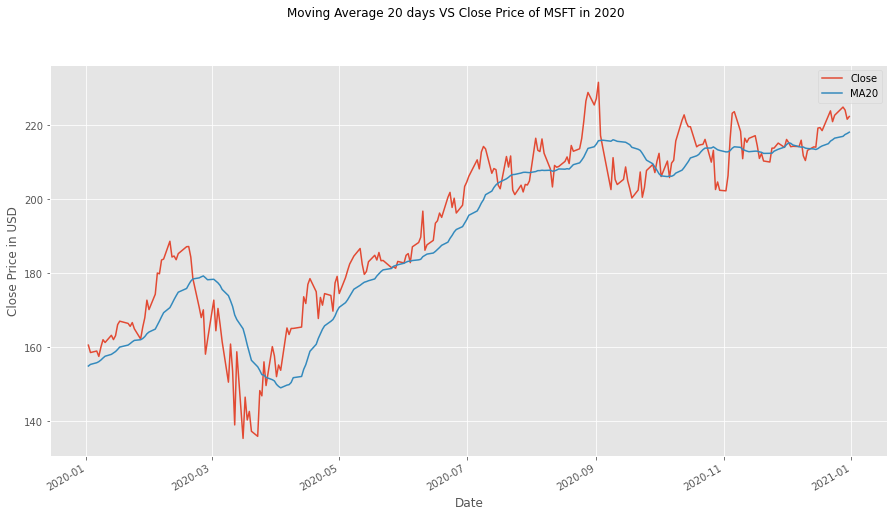

<Figure size 1080x576 with 0 Axes>

In [11]:
ma_df['Close'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8), label = 'Close')
ma_df['MA20'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8),label = 'MA20')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 20 days VS Close Price of MSFT in 2020')
plt.legend()
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

MA(100) VS Close Price in 2020

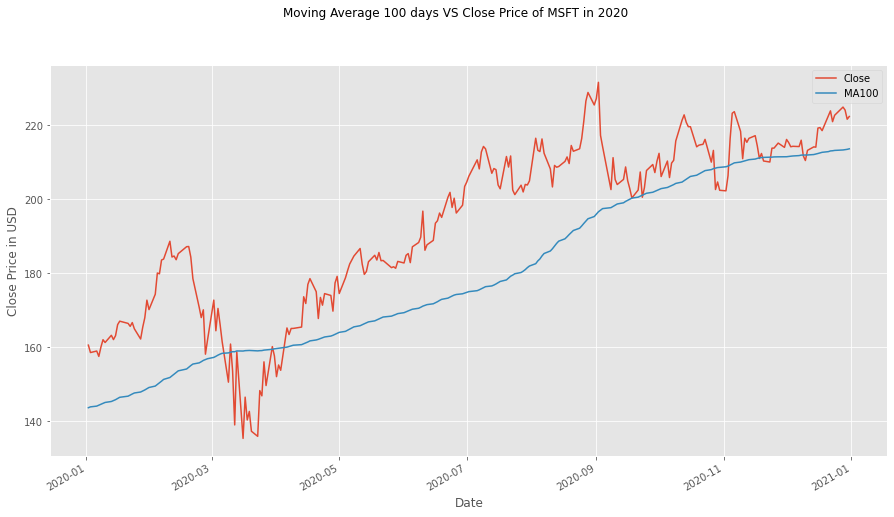

<Figure size 1080x576 with 0 Axes>

In [12]:
ma_df['Close'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8), label = 'Close')
ma_df['MA100'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8),label = 'MA100')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 100 days VS Close Price of MSFT in 2020')
plt.legend()
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

MA(200) VS Close Price in 2020

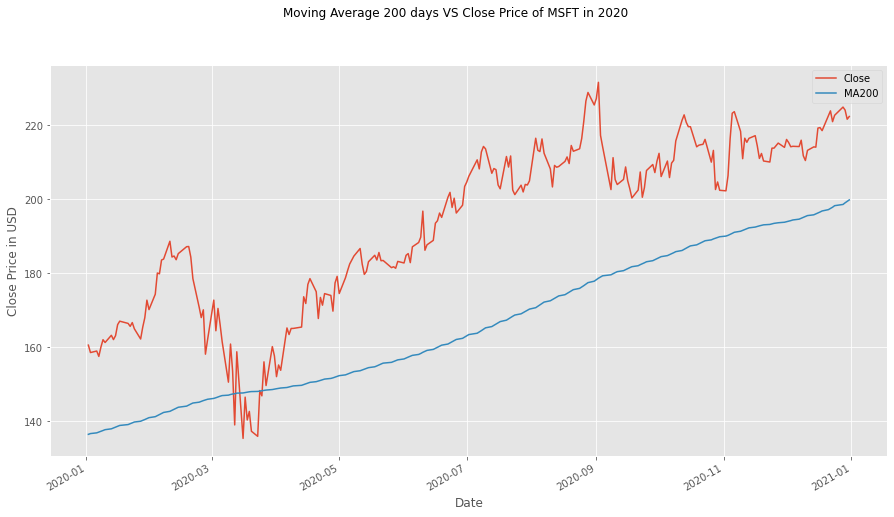

<Figure size 1080x576 with 0 Axes>

In [13]:
ma_df['Close'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8), label = 'Close')
ma_df['MA200'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8),label = 'MA200')
plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 200 days VS Close Price of MSFT in 2020')
plt.legend()
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

Plot these four MA values with close price in the same chart

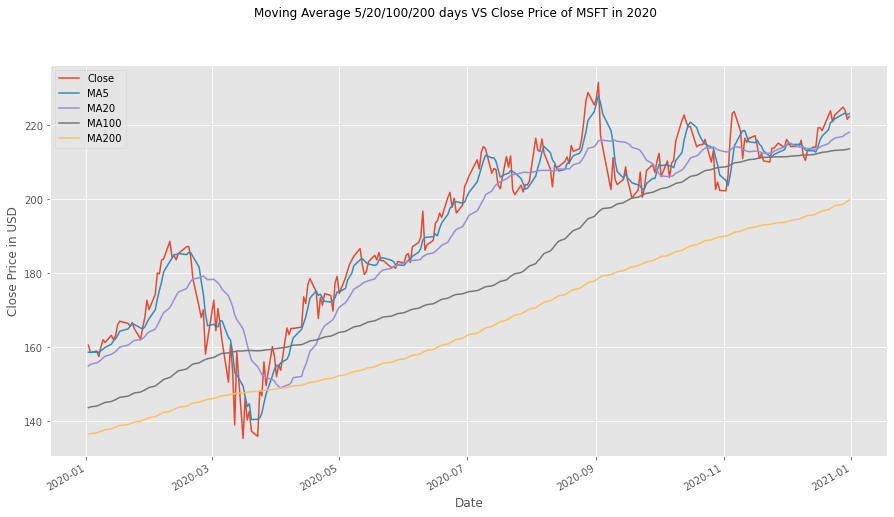

<Figure size 1080x576 with 0 Axes>

In [14]:
ma_df['Close'].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8), label = 'Close')
ma_df["MA5"].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8),label = 'MA5')
ma_df["MA20"].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8),label = 'MA20')
ma_df["MA100"].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8),label = 'MA100')
ma_df["MA200"].loc['2020-01-01':'2020-12-31'].plot(figsize = (15,8),label = 'MA200')

plt.ylabel('Close Price in USD')
plt.suptitle('Moving Average 5/20/100/200 days VS Close Price of MSFT in 2020')
plt.legend()
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

## Pre-process data function
Since the various models require different pre-processing, a function that can handle the various needs is created.

| Argument         | Description                                                  |
|------------------|--------------------------------------------------------------|
| raw_df           | Dataframe input                                              |
| Standarize       | Boolean if the data should be standarized or not             |
| Drop_standard    | Boolean if standard values should be removed or not          |
| calculation      | Array containing which calculations that should be performed |
| calculations []  | MA5, MA20, MIN, MAX, mom, vola                               |

In [15]:
#Preprocess data
def process_data(raw_df, standarize, drop_standard, calculations):
        #Set datetime as index
        raw_df.index = pd.to_datetime(raw_df.index)
        #Set label by shifting Closing price by -1
        raw_df['Label'] = raw_df['Close'].shift(-1)
        #Creating more features
        #Log_r
        log_r = np.log(raw_df['Close'] / raw_df['Close'].shift(1))
        max_roll_window = 0
        #Check which calculations should be applied
        if 'MA5' in calculations:
            raw_df['MA5'] = raw_df['Close'].rolling(5).mean()
            max_roll_window = 5
        if 'MA20' in calculations:
            raw_df['MA20'] = raw_df['Close'].rolling(20).mean()
            max_roll_window = 20
        if 'MIN' in calculations:
            raw_df['MIN'] = raw_df['Close'].rolling(max_roll_window).min()
        if 'MAX' in calculations:
            raw_df['MAX'] = raw_df['Close'].rolling(max_roll_window).max()
        if 'mom' in calculations:
            raw_df['mom'] = log_r.rolling(max_roll_window).mean()
        if 'vola' in calculations:
            raw_df['vola'] = log_r.rolling(max_roll_window).std()

        #Drop non-used columns
        if drop_standard:
            raw_df = raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        #Drop NaN values
        raw_df = raw_df.dropna()
        #Standarizing
        if standarize:
            raw_df = (raw_df - raw_df.mean())/raw_df.std()
        return raw_df

### MLP Regression With Close, MA(5) and MA(20) as features

#### Pre-process data

In [19]:
df_MLP = get_data_from_api("MSFT", start, end)
proc_df = process_data(df_MLP, False, True, ['MA5', 'MA20'])

#### Split data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    proc_df[['Close', 'MA5', 'MA20']], proc_df['Label'], shuffle = False, test_size = 0.2)

#### Perform the model

In [21]:
start_time_MLP = time.time()

from sklearn.neural_network import MLPRegressor
#MLP
rnd_state = 1
max_it = 600
regr = MLPRegressor(random_state = rnd_state, max_iter = max_it).fit(X_train, y_train)

MLPpredictions = regr.predict(X_test)
print("Execution time: %s seconds" % (time.time() - start_time_MLP))
MLPTime = time.time() - start_time_MLP

Execution time: 2.0013809204101562 seconds


#### Visualizing to understand the model behaviour

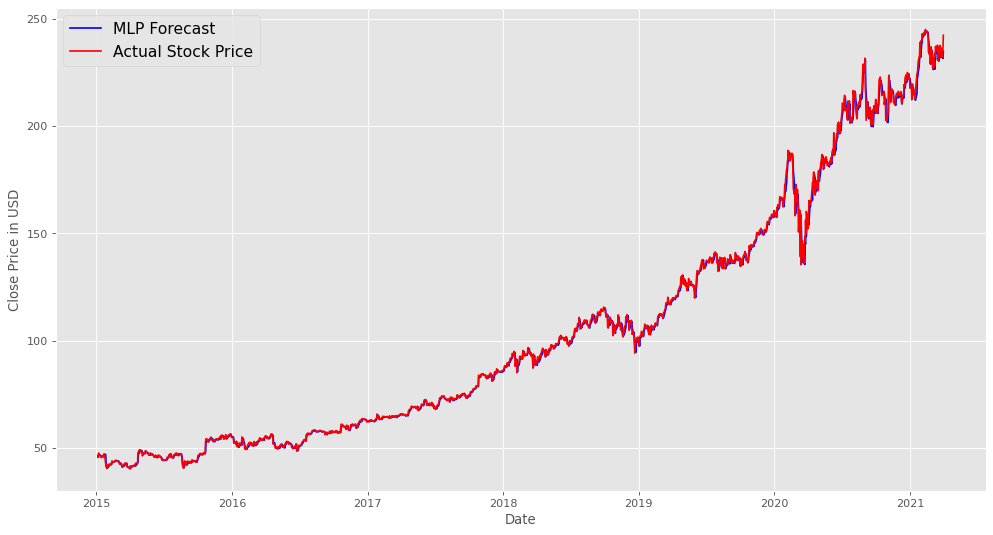

<Figure size 1080x576 with 0 Axes>

In [23]:
plt.figure(figsize = (15,8), dpi = 80)
df_pred = pd.DataFrame(data = y_test)
df_pred['MLP'] = MLPpredictions

plt.plot(df_pred['MLP'], color = "blue", label = 'MLP Forecast')
plt.plot(df_pred['Label'], color = 'red', label = 'Actual Stock Price')
plt.legend(loc = 'upper left', fontsize = 14)
style.use('ggplot')
plt.ylabel('Close Price in USD')
plt.xlabel('Date')
plt.figure(figsize = (15,8))
plt.show()

In [371]:
#Plot first 100 and last 100 side by side comparison


#### Error measurements for MLP

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#Calculate error measurements
#MSE, RMSE, MAE, MAPE

MSE_error_MLPR = mean_squared_error(y_test, MLPpredictions)
RMSE_error_MLPR = mean_squared_error(y_test, MLPpredictions, squared = False)
MAE_error_MLPR = mean_absolute_error(y_test, MLPpredictions)

print("Score: ",regr.score(X_train, y_train))
print("Score: ",regr.score(X_test, y_test))
df_error = pd.DataFrame(data = {'Model': ['MLP'], 'MSE': [MSE_error_MLPR], 'RMSE': RMSE_error_MLPR, 'MAE': MAE_error_MLPR}, index = ['Model 1'])
df_error.head(10)

Score:  0.9983348488529974
Score:  0.998305870767721


,Model,MSE,RMSE,MAE
Model 1,MLP,5.506636,2.346622,1.362892


### MLP Regression with more features
To improve the prediction performance, more features are added

#### Pre-process data

In [25]:
df_MLP2 = get_data_from_api("MSFT", start, end)
proc_df2 = process_data(df_MLP2, False, True, ['MA5', 'MA20', 'MIN', 'MAX', 'mom', 'vola'])

#### Split data

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    proc_df2[['Close', 'MA5', 'MA20', 'MIN', 'MAX', 'mom', 'vola']], proc_df2['Label'], shuffle = False, test_size = 0.2)

#### Perform the model

In [27]:
start_time_MLP_features = time.time()
rnd_state = 1
max_it = 600
regr2 = MLPRegressor(random_state = rnd_state, max_iter = max_it).fit(X_train2, y_train2)

MLPpredictions2 = regr2.predict(X_test2)
print("Execution time: %s seconds" % (time.time() - start_time_MLP_features))
MLPTime_features = time.time() - start_time_MLP_features

Execution time: 2.30039119720459 seconds


#### Visualizing to understand the model behaviour

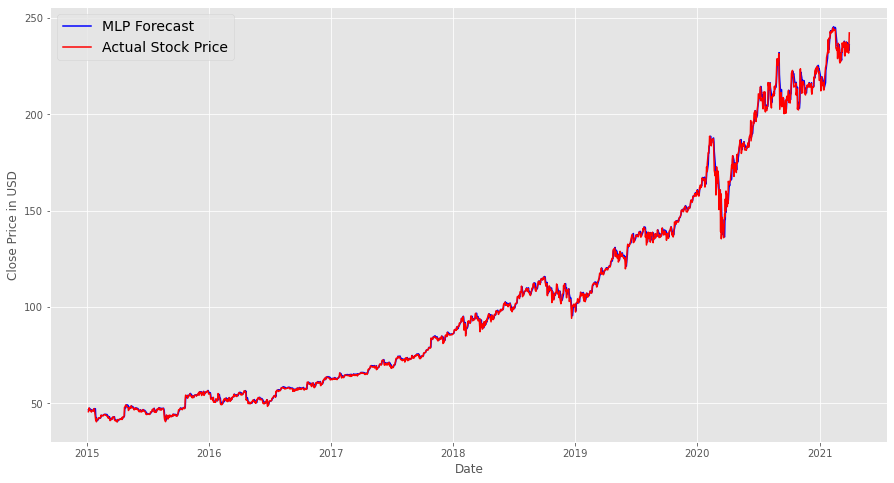

<Figure size 1080x576 with 0 Axes>

In [29]:
df_pred2 = pd.DataFrame(data = y_test2)
df_pred2['MLP'] = MLPpredictions2

plt.plot(df_pred2['MLP'], color = "blue", label = 'MLP Forecast')
plt.plot(df_pred2['Label'], color = 'red', label = 'Actual Stock Price')
plt.legend(loc = 'upper left', fontsize = 14)
style.use('ggplot')
plt.ylabel('Close Price in USD')
plt.xlabel('Date')
plt.figure(figsize = (15,8))
plt.show()

#### Error measurements of MLP model with more features

In [41]:
MSE_error_MLPR2 = mean_squared_error(y_test2, MLPpredictions2)
RMSE_error_MLPR2 = mean_squared_error(y_test2, MLPpredictions2, squared = False)
MAE_error_MLPR2 = mean_absolute_error(y_test2, MLPpredictions2)

print("Score: ",regr2.score(X_train2, y_train2))
print("Score: ",regr2.score(X_test2, y_test2))
df_error2 = pd.DataFrame(data = {'Model': ['MLP'], 'MSE': [MSE_error_MLPR2], 'RMSE': RMSE_error_MLPR2, 'MAE': MAE_error_MLPR2}, index = ['Model 1X'])
df_error2.head(10)

Score:  0.9981652978967519
Score:  0.9983630558434543


,Model,MSE,RMSE,MAE
Model 1X,MLP,5.320761,2.306677,1.327878


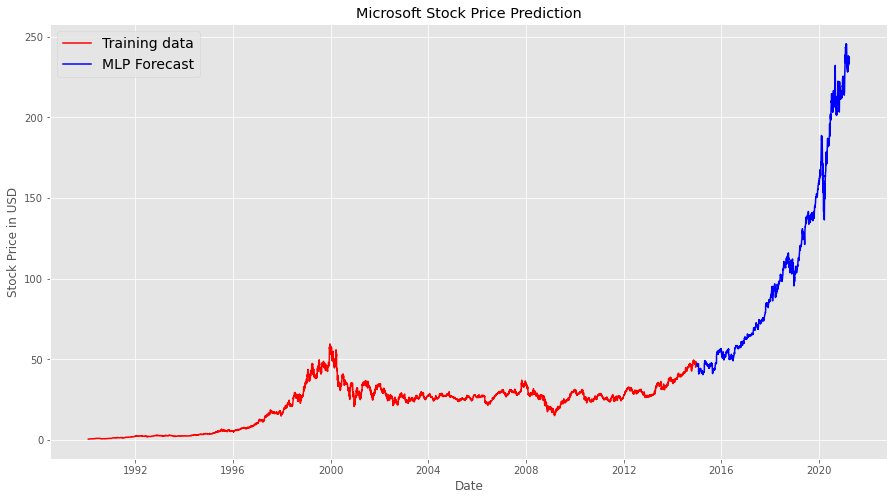

<Figure size 1080x576 with 0 Axes>

In [34]:
plt.plot(y_train2, color = 'red', label = 'Training data')
plt.plot(df_pred2['MLP'], color = 'blue',label = 'MLP Forecast')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price in USD')
plt.legend(loc = 'upper left', fontsize = 14)
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

## Trained MLP Model used on Apple Stock

In [35]:
df_MLP2_apple = get_data_from_api("AAPL", start, end)
proc_df2_apple = process_data(df_MLP2_apple, False, True, ['MA5', 'MA20', 'MIN', 'MAX', 'mom', 'vola'])

#### Split data

In [36]:
X_train2_apple, X_test2_apple, y_train2_apple, y_test2_apple = train_test_split(
    proc_df2_apple[['Close', 'MA5', 'MA20', 'MIN', 'MAX', 'mom', 'vola']], proc_df2_apple['Label'], shuffle = False, test_size = 0.2)

#### Perform the model

In [37]:
start_time_MLP_apple = time.time()
MLPpredictions2_apple = regr2.predict(X_test2_apple)
print("Execution time: %s seconds" % (time.time() - start_time_MLP_apple))
MLPTime_apple = time.time() - start_time_MLP_apple

Execution time: 0.01655125617980957 seconds


#### Visualize to understand the model behaviour

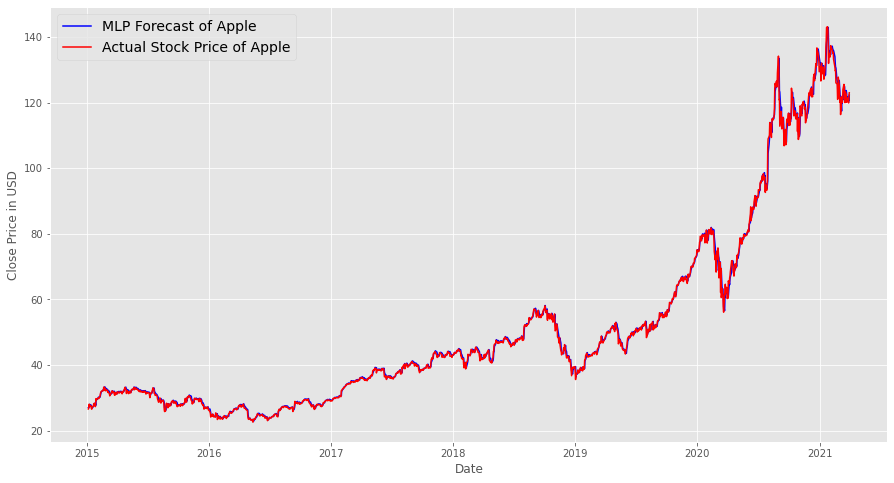

In [39]:
style.use('ggplot')
plt.figure(figsize = (15,8))
df_pred2_apple = pd.DataFrame(data = y_test2_apple)
df_pred2_apple['MLP'] = MLPpredictions2_apple

plt.plot(df_pred2_apple['MLP'], color = "blue", label = 'MLP Forecast of Apple')
plt.plot(df_pred2_apple['Label'], color = 'red', label = 'Actual Stock Price of Apple')
plt.legend(loc = 'upper left', fontsize = 14)
plt.ylabel('Close Price in USD')
plt.xlabel('Date')
plt.show()

#### Error measurements of MLP prediction on Apple

In [42]:
MSE_error_MLPR2_apple = mean_squared_error(y_test2_apple, MLPpredictions2_apple)
RMSE_error_MLPR2_apple = mean_squared_error(y_test2_apple, MLPpredictions2_apple, squared = False)
MAE_error_MLPR2_apple = mean_absolute_error(y_test2_apple, MLPpredictions2_apple)

print("Score: ",regr2.score(X_train2_apple, y_train2_apple))
print("Score: ",regr2.score(X_test2_apple, y_test2_apple))
df_error2 = pd.DataFrame(data = {'Model': ['MLP'], 'MSE': [MSE_error_MLPR2_apple], 'RMSE': RMSE_error_MLPR2_apple, 'MAE': MAE_error_MLPR2_apple}, index = ['Model 1X/AAPL'])
df_error2.head(10)

Score:  0.9994678280752872
Score:  0.9979519290552522


,Model,MSE,RMSE,MAE
Model 1X/AAPL,MLP,1.740211,1.31917,0.753031


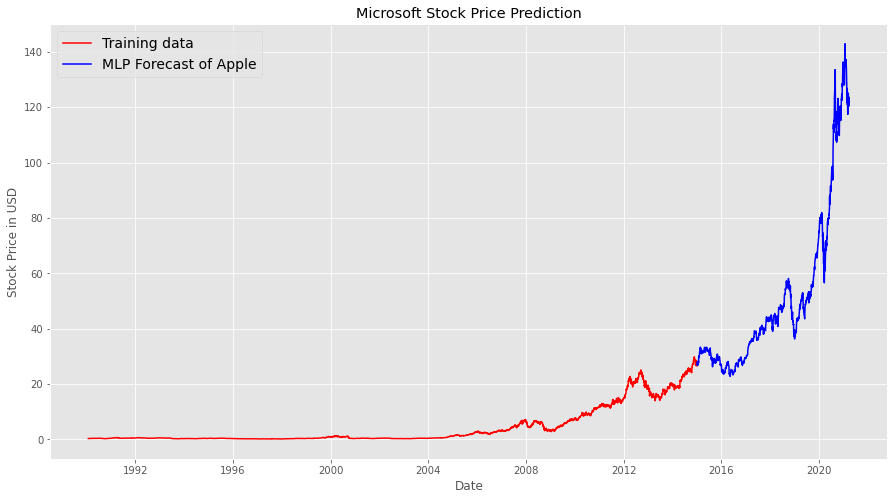

<Figure size 1080x576 with 0 Axes>

In [44]:
plt.plot(y_train2_apple, color = 'red', label = 'Training data')
plt.plot(df_pred2_apple['MLP'], color = 'blue',label = 'MLP Forecast of Apple')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price in USD')
plt.legend(loc = 'upper left', fontsize = 14)
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

## ARIMA MODEL

#### Pre-process data

In [45]:
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

start2 = datetime(1990,1,1)
end2 = datetime(2021,4,1)
arima_df = get_data_from_api("MSFT", start2, end2)
arima_df = arima_df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Set datetime as index
arima_df.index = pd.to_datetime(arima_df.index)
#Resample with day to day basis
arima_df = arima_df.resample('D').mean()
#Fill in missing days
arima_df["Close"] = arima_df["Close"].interpolate(method = 'linear', axis = 0).ffill().bfill()
#Set frequency as daily
arima_df.index.freq = 'D'

Plot Autocorrelation

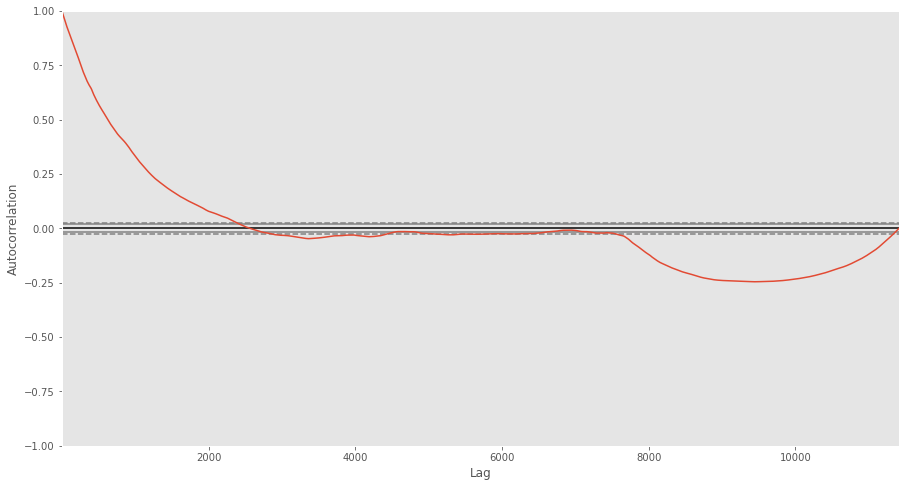

<Figure size 1080x576 with 0 Axes>

In [46]:
autocorrelation_plot(arima_df)
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.show()

Split into test and training sets

In [47]:
train_data, test_data = arima_df[0:int(len(arima_df)*0.8)], arima_df[int(len(arima_df)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values

Perform the ARIMA model on MSFT

In [ ]:
start_time_ARIMA = time.time()
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order = (4,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

print("Execution time: %s seconds" % (time.time() - start_time_ARIMA))
ArimaTime = time.time() - start_time_ARIMA

Visualizing to understand the model behaviour

In [ ]:
style.use('ggplot')
plt.figure(figsize = (15,8))
test_set_range = arima_df[int(len(arima_df)*0.8):].index
plt.plot(test_set_range, model_predictions, color = 'blue',label = 'Predicted Price of MSFT')
plt.plot(test_set_range, test_data, color = 'red', label = 'Actual Price of MSFT')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Trading Year')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

#### Error measurements og ARIMA

In [ ]:
MSE_error_ARIMA = mean_squared_error(test_data, model_predictions)
RMSE_error_ARIMA = mean_squared_error(test_data, model_predictions, squared = False)
MAE_error_ARIMA = mean_absolute_error(test_data, model_predictions)

df_error_ARIMA = pd.DataFrame(data = {'Model': ['ARIMA'], 'MSE': [MSE_error_ARIMA], 'RMSE': RMSE_error_ARIMA, 'MAE': MAE_error_ARIMA}, index = ['Model 2'])
df_error_ARIMA.head(10)

Perform the ARIMA model with MSFT data on AAPL

In [ ]:
start_apple = datetime(2021,1,1)

arima_df_apple = get_data_from_api("AAPL", start_apple, end2)
arima_df_apple = arima_df_apple.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)

#Set datetime as index
arima_df_apple.index = pd.to_datetime(arima_df_apple.index)
#Resample with day to day basis
arima_df_apple = arima_df_apple.resample('D').mean()
#Fill in missing days
arima_df_apple["Close"] = arima_df_apple["Close"].interpolate(method = 'linear', axis = 0).ffill().bfill()
#Set frequency as daily
arima_df_apple.index.freq = 'D'

In [ ]:
#Apple data set setup
test_data_apple = arima_df_apple['Close'].values

In [ ]:
start_time_ARIMA_apple = time.time()
history = [x for x in training_data]
model_predictions_apple = []
N_test_apple_observations = len(test_data_apple)
for time_point in range(N_test_apple_observations):
    model = ARIMA(history, order = (4,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions_apple.append(yhat)
    true_test_value_apple = test_data_apple[time_point]
    history.append(true_test_value_apple)

print("Execution time: %s seconds" % (time.time() - start_time_ARIMA_apple))
ARIMATime_apple = time.time() - start_time_ARIMA_apple

In [ ]:
test_set_range = arima_df_apple[:int(len(arima_df_apple)*1)].index
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.plot(test_set_range, model_predictions_apple, color = 'blue', label = 'Predicted Price of Apple')
plt.plot(test_set_range, test_data_apple, color = 'red', label = 'Actual Price of Apple')
plt.title('Apple Prices Prediction')
plt.xlabel('Trading Year')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

Error Measurements of ARIMA prediction on Apple

In [ ]:
MSE_error_ARIMA_apple = mean_squared_error(test_data_apple, model_predictions_apple)
RMSE_error_ARIMA_apple = mean_squared_error(test_data_apple, model_predictions_apple, squared = False)
MAE_error_ARIMA_apple = mean_absolute_error(test_data_apple, model_predictions_apple)

df_error_ARIMA = pd.DataFrame(data = {'Model': ['ARIMA'], 'MSE': [MSE_error_ARIMA], 'RMSE': RMSE_error_ARIMA, 'MAE': MAE_error_ARIMA}, index = ['Model 2/AAPL'])
df_error_ARIMA.head(10)

## LSTM Model
Modules needed: Keras, Tensorflow, Pandas, Scikit-Learn & Numpy
| conda install -c conda-forge keras

In [395]:
#import packages
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, BatchNormalization
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [396]:
start3 = datetime(1990,1,1)
end3 = datetime(2021,4,1)
df_LSTM = get_data_from_api("MSFT", start3, end3)

df_LSTM = df_LSTM.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
df_LSTM.head(10)

,Close
Date,
1990-01-02,0.616319
1990-01-03,0.619792
1990-01-04,0.638021
1990-01-05,0.622396
1990-01-08,0.631944
1990-01-09,0.630208
1990-01-10,0.612847
1990-01-11,0.600694
1990-01-12,0.598090


In [ ]:
cl = df_LSTM.Close.astype('float32')
train = cl[0:int(len(cl)*0.80)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl = scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations to look back slices
#create the train test dataset (90-10)
def processData(data,lb):
    X_LSTM,Y_LSTM = [],[]
    for i in range(len(data)-lb-1):
        X_LSTM.append(data[i:(i+lb),0])
        Y_LSTM.append(data[(i+lb),0])
    return np.array(X_LSTM),np.array(Y_LSTM)

lb = 10
X_LSTM,y_LSTM = processData(cl,lb)
X_train_LSTM,X_test_LSTM = X_LSTM[:int(X_LSTM.shape[0]*0.80)],X_LSTM[int(X_LSTM.shape[0]*0.80):]
y_train_LSTM,y_test_LSTM = y_LSTM[:int(y_LSTM.shape[0]*0.80)],y_LSTM[int(y_LSTM.shape[0]*0.80):]
print(X_train_LSTM.shape[0],X_train_LSTM.shape[1])
print(X_test_LSTM.shape[0],X_test_LSTM.shape[1])
print(y_train_LSTM.shape[0])
print(y_test_LSTM.shape[0])

In [398]:
start_time_LTSM = time.time()
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape = (lb,1)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')

#Reshape data for (Sample,Timestep,Features)
X_train_LSTM = X_train_LSTM.reshape((X_train_LSTM.shape[0],X_train_LSTM.shape[1],1))
X_test_LSTM = X_test_LSTM.reshape((X_test_LSTM.shape[0],X_test_LSTM.shape[1],1))

#Fit model with history to check for overfitting
history_LSTM = model.fit(X_train_LSTM,y_train_LSTM,epochs = 300,validation_data = (X_test_LSTM,y_test_LSTM),shuffle = False)

model.summary()

print("Execution time: %s seconds" % (time.time() - start_time_LTSM))
LTSMTime = time.time() - start_time_LTSM

Epoch 1/300
197/197 [==============================] - 3s 17ms/step - loss: 7.2481e-04 - val_loss: 0.2938

#### Visualize to understand the model behaviour

In [ ]:
style.use('ggplot')
plt.figure(figsize = (15,8))
Xt = model.predict(X_test_LSTM)
plt.plot(scl.inverse_transform(y_test_LSTM.reshape(-1,1)), label = "Actual Stock Price")
plt.plot(scl.inverse_transform(Xt), label = "Predicted Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price in USD")
plt.legend()
plt.title("Test Dataset")

#### Error measurements of LSTM

In [400]:
MSE_error_LSTM = mean_squared_error(y_test_LSTM.reshape(-1,1), Xt)
RMSE_error_LSTM = mean_squared_error(y_test_LSTM.reshape(-1,1), Xt, squared = False)
MAE_error_LSTM = mean_absolute_error(y_test_LSTM.reshape(-1,1), Xt)

df_errorLSTM = pd.DataFrame(data = {'Model': ['LTSM'], 'MSE': [MSE_error_LSTM], 'RMSE': RMSE_error_LSTM, 'MAE': MAE_error_LSTM}, index = ['Model 3'])
df_errorLSTM.head(3)

,Model,MSE,RMSE,MAE
Model 3,LTSM,0.326888,0.571741,0.293644


#### LTSM on Apple stock

In [401]:
df_LSTM_apple = get_data_from_api("AAPL", start3, end3)
df_LSTM_apple = df_LSTM_apple.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
df_LSTM_apple.head(10)

,Close
Date,
1990-01-02,0.332589
1990-01-03,0.334821
1990-01-04,0.335938
1990-01-05,0.337054
1990-01-08,0.339286
1990-01-09,0.335938
1990-01-10,0.321429
1990-01-11,0.308036
1990-01-12,0.308036


In [402]:
cl_apple = df_LSTM_apple.Close.astype('float32')
train_apple = cl_apple[0:int(len(cl_apple)*0.80)]
scl_apple = MinMaxScaler()
#Scale the data
scl_apple.fit(train_apple.values.reshape(-1,1))
cl_apple =scl_apple.transform(cl_apple.values.reshape(-1,1))

#Create a function to process the data into lb observations to look back slices
#Create the train test dataset (90-10)

In [403]:
lb_apple = 10
X_LSTM_apple,y_LSTM_apple = processData(cl_apple,lb_apple)
X_train_LSTM_apple,X_test_LSTM_apple = X_LSTM_apple[:int(X_LSTM_apple.shape[0]*0.80)],X_LSTM_apple[int(X_LSTM_apple.shape[0]*0.80):]
y_train_LSTM_apple,y_test_LSTM_apple = y_LSTM_apple[:int(y_LSTM_apple.shape[0]*0.80)],y_LSTM_apple[int(y_LSTM_apple.shape[0]*0.80):]
print(X_train_LSTM_apple.shape[0],X_train_LSTM_apple.shape[1])
print(X_test_LSTM_apple.shape[0], X_test_LSTM_apple.shape[1])
print(y_train_LSTM_apple.shape[0])
print(y_test_LSTM_apple.shape[0])

6290 10
1573 10
6290
1573


In [404]:
#Reshape data for (Sample,Timestep,Features)
X_test_LSTM_apple = X_test_LSTM_apple.reshape((X_test_LSTM_apple.shape[0],X_test_LSTM_apple.shape[1],1))

In [405]:
start_time_LTSM_apple = time.time()
Xt_apple = model.predict(X_test_LSTM_apple)

print("Execution time: %s seconds" % (time.time() - start_time_LTSM))
LTSMTime_apple = time.time() - start_time_LTSM_apple

Execution time: 1027.6305975914001 seconds


Text(0.5, 1.0, 'Test Dataset')

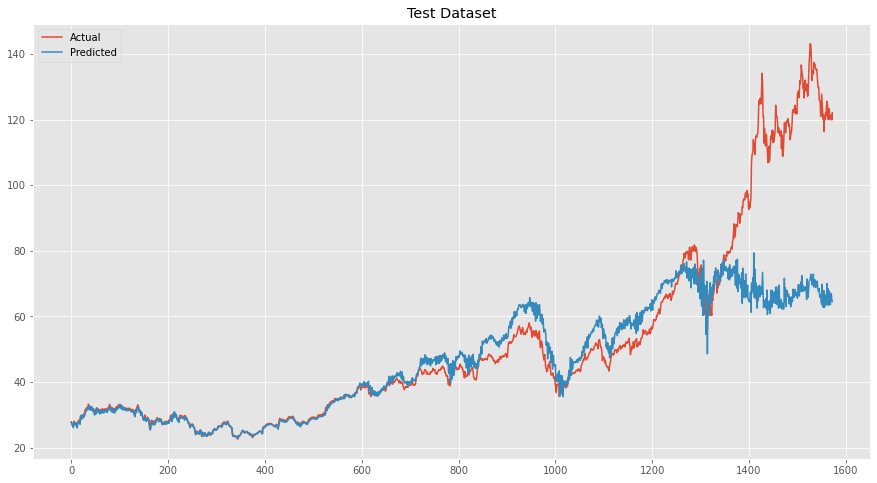

In [406]:
style.use('ggplot')
plt.figure(figsize = (15,8))
plt.plot(scl_apple.inverse_transform(y_test_LSTM_apple.reshape(-1,1)), label = "Actual")
plt.plot(scl_apple.inverse_transform(Xt_apple), label = "Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price in USD")
plt.legend()
plt.title("Test Dataset")

### Compare error measurements from the three main models

In [407]:
errors = [df_error, df_error_ARIMA, df_errorLSTM]
error_results = pd.concat(errors)

error_results.head(3)

,Model,MSE,RMSE,MAE
Model 1,MLP,5.506636,2.346622,1.362892
Model 2,ARIMA,2.994185,1.730371,0.906437
Model 3,LTSM,0.326888,0.571741,0.293644
